In [1]:
# 라이브러리 가져오기
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.font_manager as fm
import matplotlib as mpl
plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
from scipy.stats.mstats  import winsorize

In [2]:
# 데이터 로드
df = pd.read_csv("./datasets/최종.csv", index_col= 0 )

In [51]:
df["target"].value_counts()

0    10094
1     4453
Name: target, dtype: int64

In [52]:
# 최종데이터에서 금융관련 기업 추출
ind_금융 = df[df["통계청 한국표준산업분류 10차(대분류)"].str.contains("금융")]["회사명"].index

# 금융 관련 기업 삭제
df.drop(index=ind_금융, axis=0, inplace=True)

In [53]:
# 결측치 확인  - 엄슴
df.isna().sum().sum()

0

In [54]:
# 양의 무한대 값 추출 --엄슴
print(len(df[df.values == math.inf]))

# 음의 무한대 값 추출 --엄슴
print(len(df[df.values ==-np.inf]))

0
0


In [55]:
# 숫자현 컬럼만 있는 데이터프레임 생성 
# df_1 = df[df.select_dtypes(float).columns]

# 숫자형 데이터프레임 컬럼 추출
# col_int=df_1.columns

#  데이터 박스플롯으로 보기

# plt.figure(figsize=(20,20))

# for i in range(1,35,1):
#     plt.subplot(5,7,i)
#     a = df_1.iloc[:,i]
#     plt.boxplot(a)
#     b = col_int.str[:7][i-1]
#     plt.title(b)
# plt.show()
   
        

## 박스플롯 이상치 제거
- 박스플롯을 이용해서 현저하게 이상한 값이 관측되는 컬럼 제거

In [56]:
df["당좌비율"].max()

42354.18

In [57]:
df[df["당좌비율"] == 42354.18]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
1708,(주)메지온,140410,2013,0.0,0.07,2012/01/20,63339954.0,-830752.0,20484503.0,-5.89,...,1358.69,"전문, 과학 및 기술 서비스업",등기이사,405000.0,135423.0,1876.775062,0,-2.63464,0.223192,쇠퇴기


In [58]:
df.drop(index=1708, axis=0 ,inplace=True)
df.reset_index(drop=True,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be8fd7210>,
 'caps': [<matplotlib.lines.Line2D at 0x21be510d010>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be8fd5a90>],
 'medians': [<matplotlib.lines.Line2D at 0x21be510fb90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be510ef10>],
 'means': []}

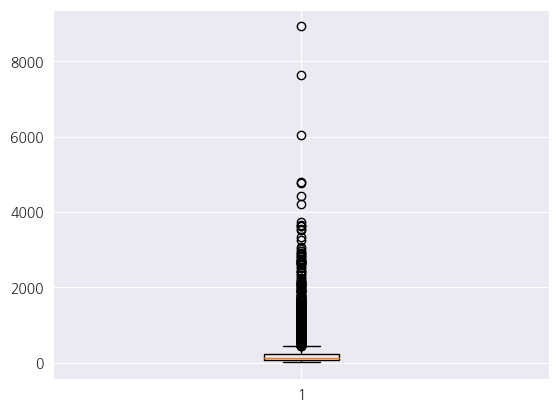

In [59]:
plt.boxplot(df["당좌비율"])

In [60]:
df["자기자본증가율"].max()

14501.35

In [61]:
df[df["자기자본증가율"] == 14501.35]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
8502,KG스틸(주),16380,2019,42.01,-0.65,1986/02/03,2.355272e+09,-30861360.0,-908619341.0,-6.02,...,93.34,제조업,"등기이사(사외이사,감사위원회 위원 제외)",66000.0,65000.0,313.225502,0,-1.319082,0.000854,도입기


In [62]:
df.drop(index=8537, axis=0 , inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be5a4c3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21be5a4cc90>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be5dde1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21be5198cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be5a4e590>],
 'means': []}

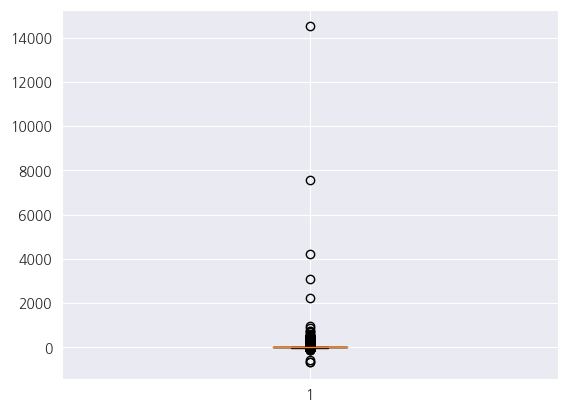

In [63]:
plt.boxplot(df["자기자본증가율"])

In [64]:
df["자기자본증가율"].max()

14501.35

In [65]:
df[df["자기자본증가율"] == 7567.04]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
8499,KG스틸(주),16380,2016,0.07,-4.6,1986/02/03,2.823221e+09,-88810885.0,-555791000.0,-2.33,...,119.53,제조업,사외이사 (감사위원회 위원 제외),45000.0,59000.0,128.744359,0,-1.255316,0.000891,성숙기


In [66]:
df.drop(index=8534, axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be9143390>,
 'caps': [<matplotlib.lines.Line2D at 0x21be9141c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be9140410>],
 'medians': [<matplotlib.lines.Line2D at 0x21be5a43f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be9142a90>],
 'means': []}

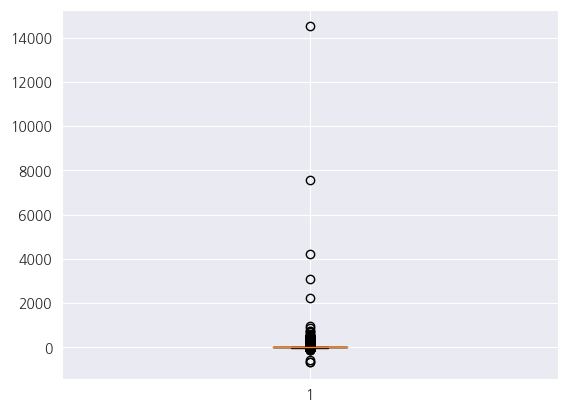

In [67]:
plt.boxplot(df["자기자본증가율"])

In [68]:
df[df["자기자본순이익률"] < -1000]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
5542,(주)이엠네트웍스,87730,2019,-0.24,-0.58,2008/04/04,5.884158e+07,-89695335.0,-9.102116e+07,0.00,...,405.37,제조업,"등기이사(사외이사,감사위원회 위원 제외)",56000.0,43000.0,1156.460294,0,-0.977071,0.104335,도입기
8898,금호건설(주),2990,2012,38.72,-0.45,1976/06/26,1.932235e+09,-420973629.0,-1.001456e+09,-47.51,...,58.49,건설업,등기이사,218000.0,51536.0,147.109115,0,-1.158544,0.000000,쇠퇴기


In [69]:
df.drop(index=[5566,8933], axis=0, inplace=True)
df.reset_index(drop=True,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be5be94d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21be5bea650>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be59b84d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21be5eb19d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be5eb15d0>],
 'means': []}

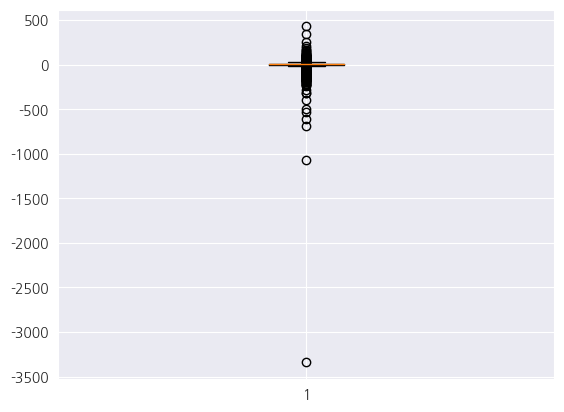

In [70]:
plt.boxplot(df["자기자본순이익률"])

In [71]:
df["현금비율"].max()

2745.25

In [72]:
df[df["현금비율"] == 2745.25]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
12106,위즈코프(주),38620,2011,-0.03,-0.97,2000/05/04,31662265.0,-5573150.0,2640225.0,0.0,...,258.83,도매 및 소매업,등기이사,127800.0,17103.0,577.303137,0,-0.756413,0.0,쇠퇴기


In [73]:
df.drop(index=12163, axis=0, inplace=True)


In [74]:
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be5f7e3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21bd2682e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be51a6450>],
 'medians': [<matplotlib.lines.Line2D at 0x21be9195750>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be9095050>],
 'means': []}

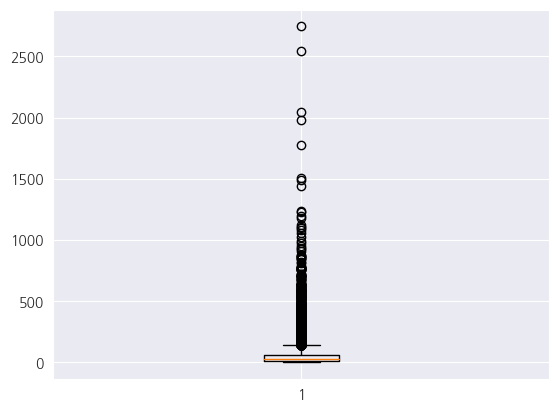

In [75]:
plt.boxplot(df["현금비율"])

In [76]:
np.argmax(df["투자집중도"])

785

In [77]:
df.drop(index=796, axis=0, inplace=True)
df.reset_index(drop=True,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be3c60890>,
 'caps': [<matplotlib.lines.Line2D at 0x21be3c60b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be3c62210>],
 'medians': [<matplotlib.lines.Line2D at 0x21be3c597d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be3c58350>],
 'means': []}

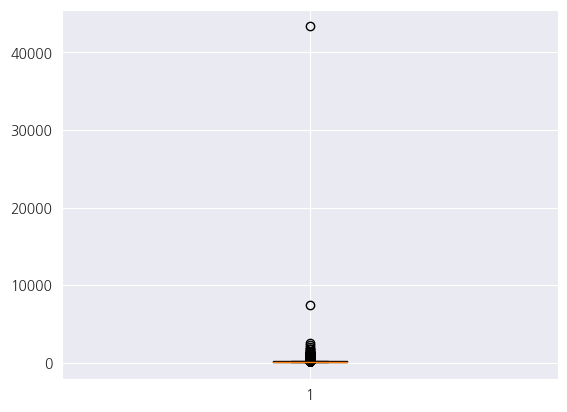

In [78]:
plt.boxplot(df["투자집중도"])

In [79]:
np.argmax(df["투자집중도"])

785

In [80]:
df.drop(index=8399, axis=0, inplace=True)
df.reset_index(drop=True,inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be5e75850>,
 'caps': [<matplotlib.lines.Line2D at 0x21be5dc8750>,
 'boxes': [<matplotlib.lines.Line2D at 0x21bcf9b84d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21be3c5de90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be5e76210>],
 'means': []}

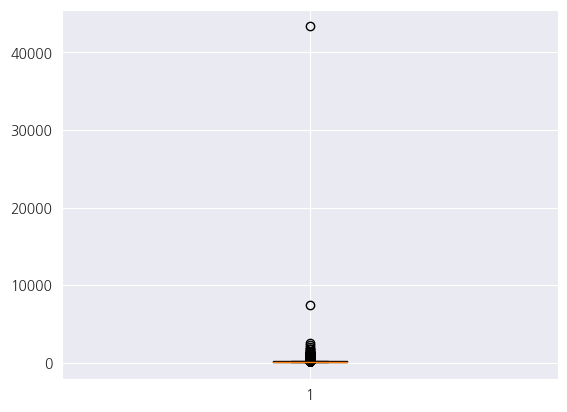

In [81]:
plt.boxplot(df["투자집중도"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21be5db0610>,
 'caps': [<matplotlib.lines.Line2D at 0x21be5db2a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be5db2090>],
 'medians': [<matplotlib.lines.Line2D at 0x21be5db0dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be5db0d10>],
 'means': []}

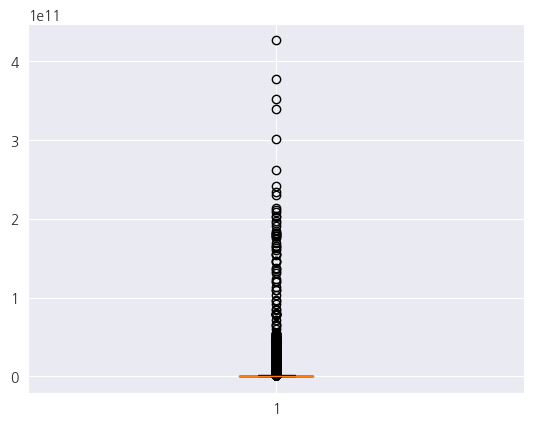

In [82]:
plt.boxplot(df["자산"])

In [83]:
np.argmax(df["매출액증가율"])

786

In [84]:
df.drop(index=796, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be5cdfa50>,
 'caps': [<matplotlib.lines.Line2D at 0x21be5cd58d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be5cdc110>],
 'medians': [<matplotlib.lines.Line2D at 0x21be5cd6150>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be5d1d010>],
 'means': []}

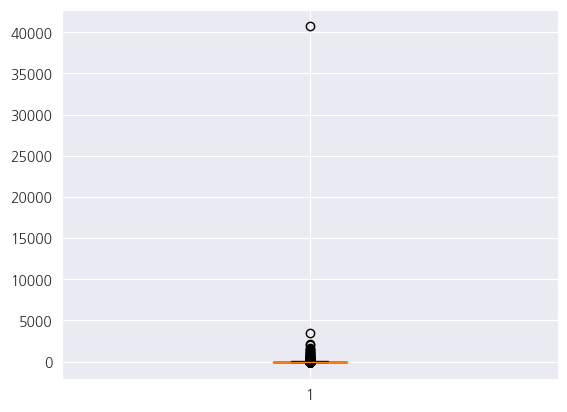

In [85]:
plt.boxplot(df["매출액증가율"])

In [86]:
df[df["매출원가대매출액비율"]>=300]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
5277,(주)유수홀딩스,700,2012,1.29,-1.53,1956/03/03,615691690.0,-215617612.0,-242455412.0,-28.84,...,233.95,"전문, 과학 및 기술 서비스업",등기이사,461364.0,58613.0,395.665739,0,0.337501,0.0,성숙기
8359,(주)휴맥스홀딩스,28080,2017,-20.07,0.00,1997/04/16,192627732.0,-659818.0,50415624.0,-13.03,...,115.49,정보통신업,"등기이사(사외이사,감사위원회 위원 제외)",160032.0,103589.0,314.537550,0,-0.978376,0.0,성숙기


In [87]:
df.drop(index=[5301,8394], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be5c0e2d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21be5c0d910>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be5c0c3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21be5c0c690>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be5c0ead0>],
 'means': []}

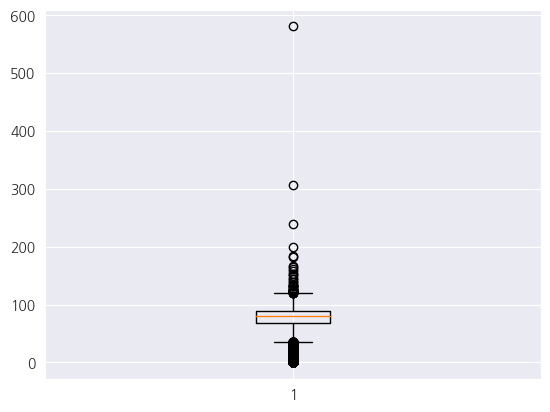

In [88]:
plt.boxplot(df["매출원가대매출액비율"])

In [89]:
df[df["부채비율"]>=20000]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
8492,KG스틸(주),16380,2015,35.18,2.40,1986/02/03,2.890469e+09,-25421390.0,-467445000.0,-14.83,...,121.80,제조업,등기이사,175000.0,41000.0,35.776036,0,-1.910808,0.000868,쇠퇴기
8495,KG스틸(주),16380,2018,0.03,-0.01,1986/02/03,2.506059e+09,-64063256.0,-877119000.0,-6.65,...,94.81,제조업,"등기이사(사외이사,감사위원회 위원 제외)",180000.0,62000.0,71.567943,0,-0.642527,0.000760,쇠퇴기


In [90]:
df.drop(index=[8527,8529], axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)
# 

{'whiskers': [<matplotlib.lines.Line2D at 0x21be5a8ff50>,
 'caps': [<matplotlib.lines.Line2D at 0x21be5a8c890>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be5a8c0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21be5a8d8d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be5a8e350>],
 'means': []}

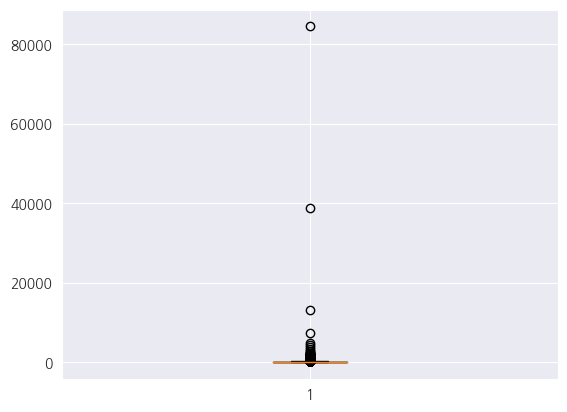

In [91]:
plt.boxplot(df["부채비율"])

In [92]:
np.argmax(df["1인평균지급액(임원)"])

10753

In [93]:
df.drop(index=10799, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be5a55310>,
 'caps': [<matplotlib.lines.Line2D at 0x21be59d3b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be5a1ea10>],
 'medians': [<matplotlib.lines.Line2D at 0x21be59d1f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be59d8f10>],
 'means': []}

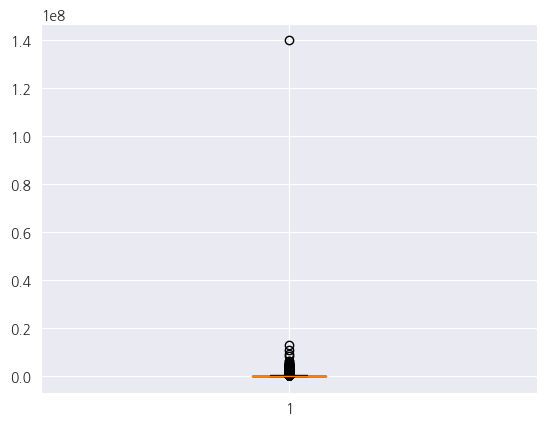

In [94]:
plt.boxplot(df["1인평균지급액(임원)"])

In [95]:
np.argmax(df["순이익증가율"])

5097

In [96]:
df.drop(index=5121, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be2af7290>,
 'caps': [<matplotlib.lines.Line2D at 0x21be2ae37d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be5996a10>],
 'medians': [<matplotlib.lines.Line2D at 0x21be2ae20d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be2ae2750>],
 'means': []}

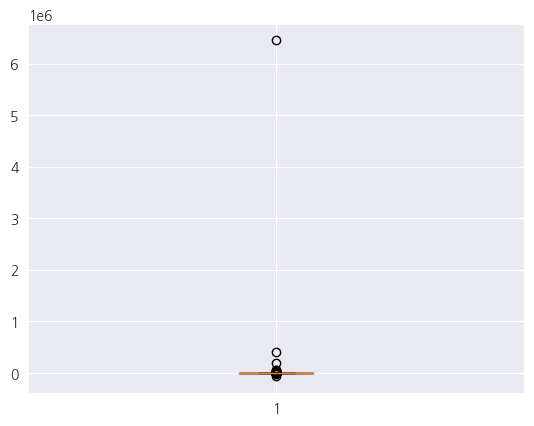

In [97]:
plt.boxplot(df["순이익증가율"])

In [98]:
df[df["순이익증가율"] >= 150000]["순이익증가율"]

5097     6452079.09
9104      199889.39
13189     398531.72
Name: 순이익증가율, dtype: float64

In [99]:
df.drop(index=[9139,13254], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be2a328d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21be2a320d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be2a330d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21be2961290>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be2a32550>],
 'means': []}

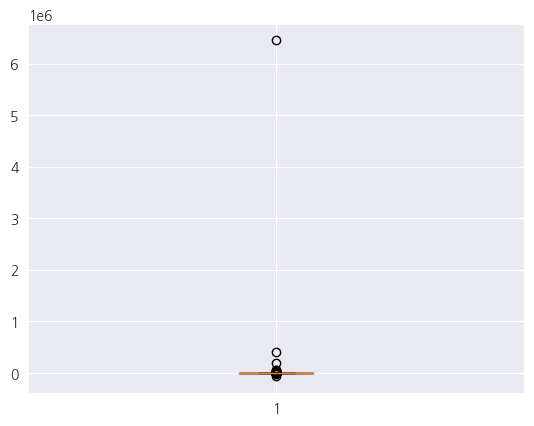

In [100]:
plt.boxplot(df["순이익증가율"])

In [101]:
df[df["순이익증가율"]<-40000]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
4058,(주)에이비프로바이오,195990,2017,-40.48,-0.69,2015/04/13,171929134.0,-13507026.0,39653553.0,3.31,...,246.43,제조업,사외이사 (감사위원회 위원 제외),1000.0,46932.0,541.173866,0,-0.107189,0.054895,쇠퇴기


In [102]:
df.drop(index=4069, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be5107bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x21be5106350>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be5119dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x21be5104f50>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be5106a50>],
 'means': []}

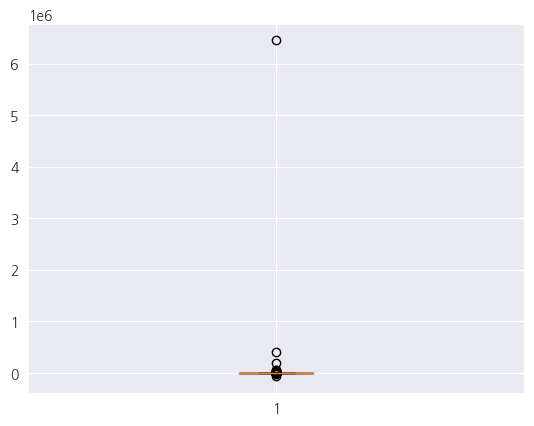

In [103]:
plt.boxplot(df["순이익증가율"])

In [104]:
df[df["차입금비율"] > 3000]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
8489,KG스틸(주),16380,2014,0.72,-1.32,1986/02/03,3.393941e+09,-1.341091e+09,-4.410170e+08,-35.25,...,107.05,제조업,등기이사,449000.0,55000.0,26.140330,0,-2.033319,0.001276,쇠퇴기
8490,KG스틸(주),16380,2015,35.18,2.40,1986/02/03,2.890469e+09,-2.542139e+07,-4.674450e+08,-14.83,...,121.80,제조업,등기이사,175000.0,41000.0,35.776036,0,-1.910808,0.000868,쇠퇴기
8493,KG스틸(주),16380,2018,0.03,-0.01,1986/02/03,2.506059e+09,-6.406326e+07,-8.771190e+08,-6.65,...,94.81,제조업,"등기이사(사외이사,감사위원회 위원 제외)",180000.0,62000.0,71.567943,0,-0.642527,0.000760,쇠퇴기
8888,금호건설(주),2990,2012,38.72,-0.45,1976/06/26,1.932235e+09,-4.209736e+08,-1.001456e+09,-47.51,...,58.49,건설업,등기이사,218000.0,51536.0,147.109115,0,-1.158544,0.000000,쇠퇴기
14317,현진소재(주),53660,2017,-22.15,-0.85,2002/02/15,1.808084e+08,-1.634895e+07,-9.836376e+07,-11.26,...,103.84,제조업,"등기이사(사외이사,감사위원회 위원 제외)",232000.0,48476.0,75.369515,0,-0.580807,0.004175,쇠퇴기


In [105]:
df.drop(index=[8524, 14393], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21bcf9867d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21be2ce8c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be5bc6450>],
 'medians': [<matplotlib.lines.Line2D at 0x21be8f678d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be2779d50>],
 'means': []}

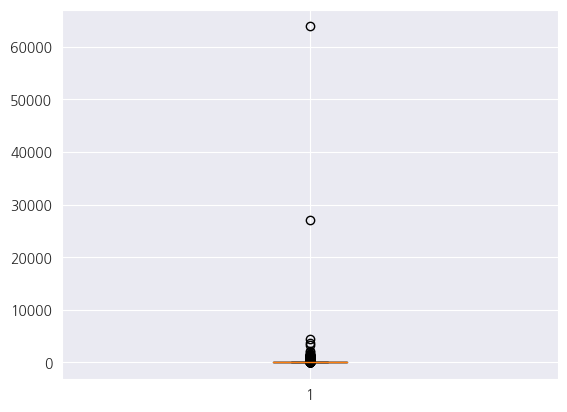

In [106]:
plt.boxplot(df["차입금비율"])

In [107]:
df[df["토빈Q"] >= 30000]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
2519,(주)서산,79650,2016,-15.83,0.53,2005/01/21,122973927.0,2366409.0,14756679.0,11.37,...,101.41,제조업,"등기이사(사외이사,감사위원회 위원 제외)",189000.0,43109.0,34136.596780,1,-1.217115,0.000000,성숙기
11347,에스비더블유생명과학(주),151910,2017,1.44,-0.53,2012/08/02,83933967.0,-25894987.0,-26276885.0,4.01,...,218.27,제조업,"등기이사(사외이사,감사위원회 위원 제외)",28768.0,39000.0,55228.223302,0,-0.159202,0.006856,도입기


In [108]:
df.drop(index=[2530,11393], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be5f222d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21be5f1b1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be8fa6a10>],
 'medians': [<matplotlib.lines.Line2D at 0x21be5f19050>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be2963910>],
 'means': []}

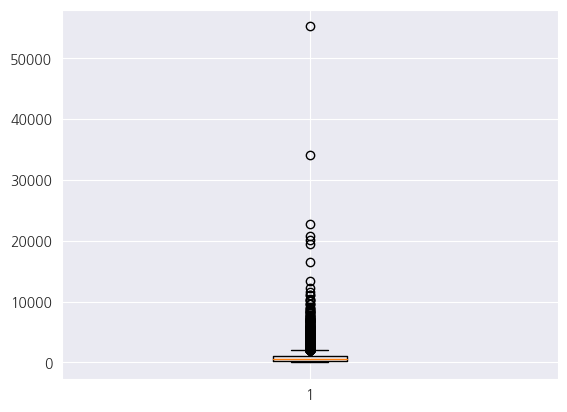

In [109]:
plt.boxplot(df["토빈Q"])

In [110]:
df[df["총자본증가율"] >= 750]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
645,(주)녹원씨엔아이,65560,2017,2.73,0.10,2003/07/01,1.140124e+08,-7.298649e+06,-1.206589e+07,922.64,...,484.48,제조업,"등기이사(사외이사,감사위원회 위원 제외)",24000.0,36000.0,834.250642,0,16.572745,0.029527,성장기
6640,(주)케이프,64820,2016,0.00,0.48,2007/05/29,1.469791e+09,6.934307e+06,3.622498e+07,845.91,...,103.42,제조업,"등기이사(사외이사,감사위원회 위원 제외)",214000.0,32594.0,44.346978,0,17.412704,0.001467,성장기
11448,에스케이(주),34730,2015,-0.22,2.27,2009/11/11,9.663381e+10,5.821064e+09,6.628876e+09,1720.86,...,198.81,"전문, 과학 및 기술 서비스업",등기이사,752000.0,71000.0,188.507497,1,50.331347,0.053603,성숙기


In [111]:
df.drop(index=[656, 6664, 11494], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be5cfb5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x21be5b60550>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be5cf9410>],
 'medians': [<matplotlib.lines.Line2D at 0x21be5b62850>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be5cfa290>],
 'means': []}

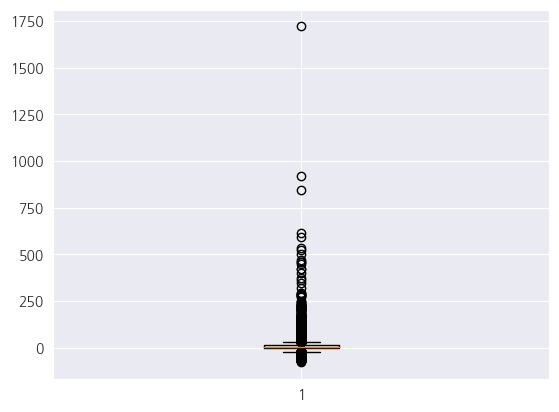

In [112]:
plt.boxplot(df["총자본증가율"])

In [113]:
df[(df["총포괄이익증가율"]>=50000)] # or (df["총포괄이익증가율"]<= -50000)]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
9402,대한제강(주),84010,2015,0.00,10.22,2005/10/31,635458249.0,34118801.0,364027047.0,-18.18,...,61.00,제조업,등기이사,923197.0,58621.0,342.182363,0,-1.630881,0.000001,쇠퇴기
9658,동일고무벨트(주),163560,2018,0.11,0.15,2012/10/19,284848797.0,9835573.0,19640271.0,4.88,...,106.21,제조업,사외이사 (감사위원회 위원 제외),39778.0,60784.0,288.320513,0,-0.510101,0.011765,성숙기


In [114]:
df[df["총포괄이익증가율"]<= -50000]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
7766,(주)한국전자홀딩스,6200,2019,-4.21,-0.15,1979/11/30,389933341.0,-4767389.0,-4712662.0,-0.23,...,127.99,"전문, 과학 및 기술 서비스업","등기이사(사외이사,감사위원회 위원 제외)",195000.0,51492.0,87.039264,0,-2.957949,1.067443,성숙기
12674,제일파마홀딩스(주),2620,2014,29.54,-2.95,1988/01/20,409567197.0,2095459.0,8097492.0,3.40,...,69.41,"전문, 과학 및 기술 서비스업",등기이사,256167.0,45369.0,771.846370,0,-0.529720,0.032701,쇠퇴기
13095,코웰패션(주),33290,2014,-5.57,-0.28,1997/10/13,109074729.0,1922645.0,19899781.0,-13.97,...,172.86,도매 및 소매업,등기이사,102000.0,33000.0,251.343268,0,-0.407581,0.033393,쇠퇴기


In [115]:
df.drop(index=[9437,9693, 7790,12731, 13152], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be8f9a290>,
 'caps': [<matplotlib.lines.Line2D at 0x21be8f997d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be9151a10>],
 'medians': [<matplotlib.lines.Line2D at 0x21be8f98290>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be51b1990>],
 'means': []}

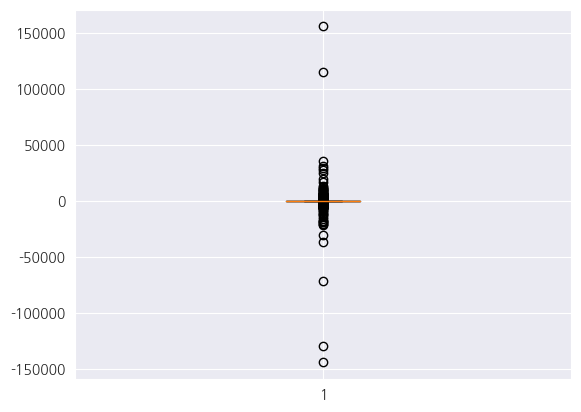

In [116]:
plt.boxplot(df["총포괄이익증가율"])

In [117]:
np.argmax(df["비유동비율"])

8486

In [118]:
df.drop(index=6137, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be5f55710>,
 'caps': [<matplotlib.lines.Line2D at 0x21be5f57110>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be9036d10>],
 'medians': [<matplotlib.lines.Line2D at 0x21be5f54550>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be5f4eb10>],
 'means': []}

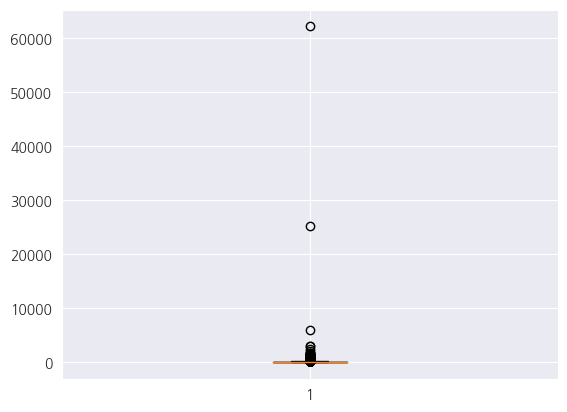

In [119]:
plt.boxplot(df["비유동비율"])

In [120]:
df["이자보상배율(이자비용)"].replace(999999999,0, inplace=True)

In [121]:
df["이자보상배율(이자비용)"].value_counts().sort_values(ascending=False)

0.00       728
0.62        19
1.02        17
1.30        17
1.03        16
          ... 
6803.64      1
3349.88      1
475.17       1
16.40        1
252.02       1
Name: 이자보상배율(이자비용), Length: 6595, dtype: int64

In [122]:
np.argmax(df["WW지수"])

785

In [123]:
df.drop(index=12083, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be5b9ee50>,
 'caps': [<matplotlib.lines.Line2D at 0x21be8f97990>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be91060d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21be8f95bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be51a8810>],
 'means': []}

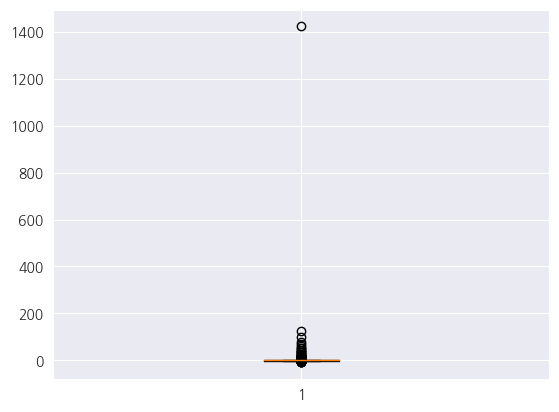

In [124]:
plt.boxplot(df["WW지수"])

In [125]:
df[df["비유동자산증가율"]>=800]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
1395,(주)디에스케이,109740,2016,13.39,-0.13,2009/09/23,1.793898e+08,7.187904e+06,3.708273e+07,225.88,...,286.70,제조업,"등기이사(사외이사,감사위원회 위원 제외)",207933.0,49066.0,1235.926632,1,-1.017019,0.017316,성장기
1874,(주)미투온,201490,2017,-18.69,0.00,2016/10/10,1.494192e+08,5.454500e+05,5.061817e+06,215.63,...,525.46,정보통신업,"등기이사(사외이사,감사위원회 위원 제외)",97000.0,35000.0,1823.434693,0,2.077715,0.000000,성장기
4166,(주)에코마케팅,230360,2017,-0.52,0.63,2016/08/08,9.312534e+07,7.794230e+06,3.722922e+07,16.57,...,380.27,"전문, 과학 및 기술 서비스업","등기이사(사외이사,감사위원회 위원 제외)",57625.0,90736.0,1615.721427,0,2.279256,0.023730,쇠퇴기
5931,(주)젬백스링크,64800,2017,-3.72,-0.11,2002/08/22,3.824073e+08,3.698130e+05,1.152760e+07,419.82,...,185.27,도매 및 소매업,"등기이사(사외이사,감사위원회 위원 제외)",33804.0,84017.0,514.208465,0,16.043779,0.100901,성장기
6903,(주)키다리스튜디오,20120,2021,-23.93,-0.76,1996/07/03,2.901222e+08,3.548090e+06,1.174628e+07,502.47,...,225.69,정보통신업,사외이사 (감사위원회 위원 제외),24000.0,59953.0,1852.450011,0,5.733984,0.000000,성숙기
7544,(주)플레이위드,23770,2014,0.50,0.18,1994/11/07,7.493349e+07,2.077322e+06,-2.824497e+07,-4.86,...,51.61,정보통신업,등기이사,54000.0,42000.0,238.624060,0,-0.017441,0.000000,쇠퇴기
11442,에스케이(주),34730,2015,-0.22,2.27,2009/11/11,9.663381e+10,5.821064e+09,6.628876e+09,1720.86,...,198.81,"전문, 과학 및 기술 서비스업",등기이사,752000.0,71000.0,188.507497,1,50.331347,0.053603,성숙기
13290,평화산업(주),90080,2014,41.41,1.76,2006/06/02,1.612047e+08,-1.750261e+06,-1.030280e+06,136.51,...,56.11,제조업,등기이사,195000.0,43000.0,286.042526,0,1.501385,0.000000,쇠퇴기


In [126]:
df.drop(index=[1406,1885,4179,5955,6927,7568,13355], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be2979f50>,
 'caps': [<matplotlib.lines.Line2D at 0x21be2978ed0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be90fcc10>],
 'medians': [<matplotlib.lines.Line2D at 0x21be297af10>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be5f4a3d0>],
 'means': []}

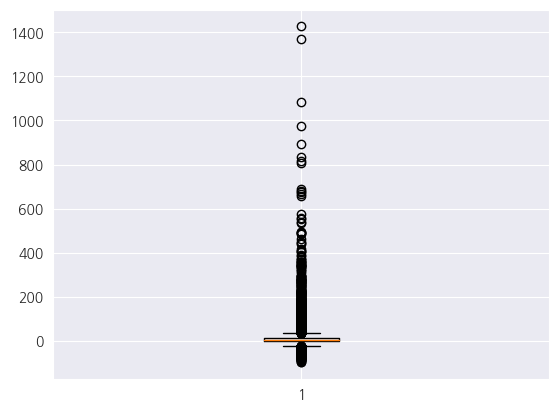

In [127]:
plt.boxplot(df["비유동자산증가율"])

In [128]:
df[df["매출액순이익률"] >= 2000]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
784,(주)대덕,8060,2020,0.14,-2.35,1989/01/26,1.638749e+09,8.127835e+07,8.126245e+07,36.35,...,43349.11,"전문, 과학 및 기술 서비스업",사외이사 (감사위원회 위원 제외),36000.0,70000.0,140.268195,0,-4.347769,0.0,쇠퇴기
2146,(주)비지에프,27410,2017,0.00,-14.48,2014/05/19,8.581186e+08,3.507921e+09,4.221043e+09,-55.25,...,543.66,"전문, 과학 및 기술 서비스업","등기이사(사외이사,감사위원회 위원 제외)",458000.0,64000.0,1233.263180,1,-2.833170,0.0,성숙기
13558,한국앤컴퍼니(주),240,2012,0.16,-9.49,1968/12/27,9.743112e+08,3.277158e+09,3.589502e+09,-78.61,...,1418.76,"전문, 과학 및 기술 서비스업",등기이사,1905000.0,67000.0,535.841995,0,-3.669775,0.0,성숙기


In [129]:
df.drop(index=[2157, 13623], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be8f89e50>,
 'caps': [<matplotlib.lines.Line2D at 0x21be8f88c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be8ef7690>],
 'medians': [<matplotlib.lines.Line2D at 0x21be8f8bc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be8f89690>],
 'means': []}

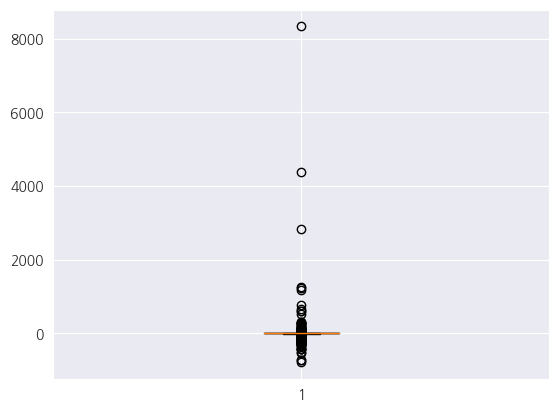

In [130]:
plt.boxplot(df["매출액순이익률"])

In [131]:
np.argmax(df["유동비율"])

9460

In [132]:
df.drop(index=9495, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be8f37dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x21be8f35590>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be8f38b50>],
 'medians': [<matplotlib.lines.Line2D at 0x21be8f35310>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be8f290d0>],
 'means': []}

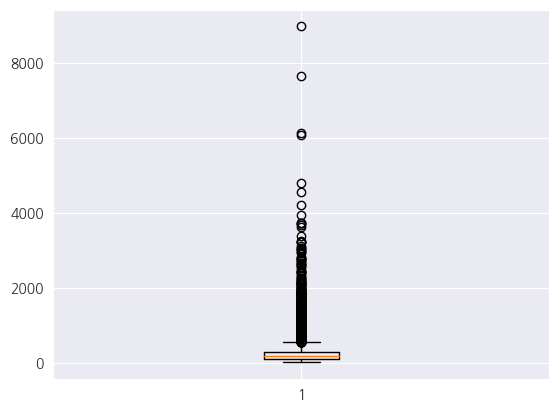

In [133]:
plt.boxplot(df["유동비율"])

In [134]:
df[df["유동비율"]>=5000]

,회사명,거래소코드,회계년도,대주주지분변화분,외국인지분분변화,상장일,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,...,투자집중도,통계청 한국표준산업분류 10차(대분류),직급명,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,target,WW지수,RDS,수명주기
4849,(주)와이팜,332570,2020,-1.31,0.36,2020/07/31,104877510.0,9295790.0,17136642.0,0.00,...,228.82,제조업,사외이사 (감사위원회 위원 제외),0.0,87000.0,4763.258573,0,-0.902782,0.091820,도입기
9460,데브시스터즈(주),194480,2015,53.68,-2.03,2014/10/06,157873953.0,-615170.0,47175280.0,0.00,...,729.27,정보통신업,등기이사,225886.0,56152.0,1937.359172,0,-1.062441,0.080862,쇠퇴기
9461,데브시스터즈(주),194480,2016,-12.98,0.96,2014/10/06,149724792.0,-10505070.0,36637463.0,-5.16,...,919.63,정보통신업,"등기이사(사외이사,감사위원회 위원 제외)",325600.0,60926.0,1149.253707,0,-1.652578,0.141280,성장기
12076,위즈코프(주),38620,2011,-0.03,-0.97,2000/05/04,31662265.0,-5573150.0,2640225.0,0.00,...,258.83,도매 및 소매업,등기이사,127800.0,17103.0,577.303137,0,-0.756413,0.000000,쇠퇴기


In [135]:
df.drop(index=[4873, 9495], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be8face50>,
 'caps': [<matplotlib.lines.Line2D at 0x21be8fc4ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be911ab50>],
 'medians': [<matplotlib.lines.Line2D at 0x21be90ca290>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be8fad3d0>],
 'means': []}

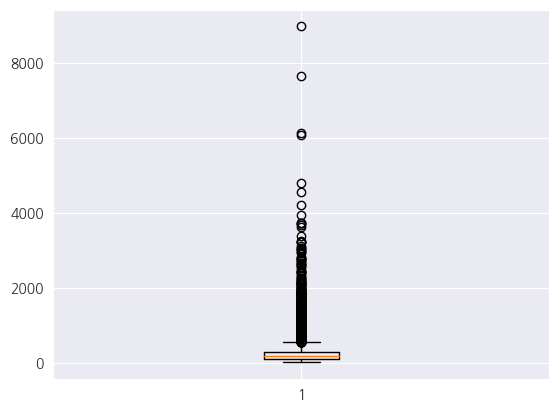

In [136]:
plt.boxplot(df["유동비율"])

In [137]:
np.argmax(df["RDS"])

474

In [138]:
df.drop(index=485, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21be5b73f10>,
 'caps': [<matplotlib.lines.Line2D at 0x21be5b25a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x21be5b24350>],
 'medians': [<matplotlib.lines.Line2D at 0x21be5b26ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21be5f520d0>],
 'means': []}

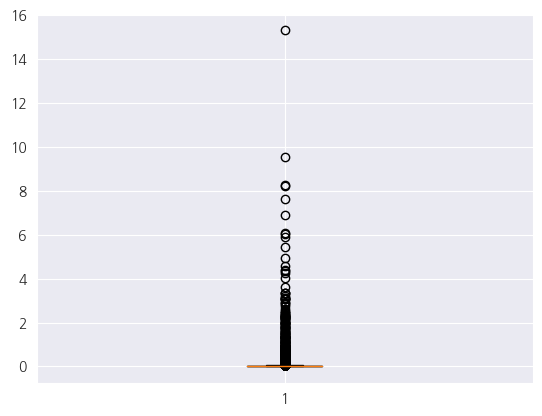

In [139]:
plt.boxplot(df["RDS"])

In [140]:
# 눈에 띄는 이상치만을 제거한 데이터프레인 저장
df.to_csv("이상치제거전.csv", encoding="UTF-8-sig")

# 이상치 제거

In [3]:
# 이상치 제거를 위한 이상치제거 전 데이터 로드
df = pd.read_csv("./datasets/이상치제거csv.csv", index_col=0)


## 윈저라이징

In [142]:
# 숫자 컬럼만 있는 데이터프레임 생성 
df_수치 = df[df.select_dtypes(float).columns]
col_int = df_수치.columns
col_all = df.columns
col_obj = col_all.difference(col_int)
df_명목 = df[col_obj]

In [143]:
# 라이브러리 로드
from scipy.stats.mstats  import winsorize

# 윈저라이징을 이용해서 상위 25% 이상의 값 과 하위 25% 이하의 값을 상의 25% 값과 하위 25% 값으로 대체
df_1 = pd.DataFrame()
for i in col_int:
    a = winsorize(df_수치[i],limits=[0.25, 0.25])
    df_1[i] = a

df_수치 =df_1
df_수치

,대주주지분변화분,외국인지분분변화,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,비유동자산증가율,유동자산증가율,자기자본증가율,매출액증가율,...,차입금비율,이자보상배율(이자비용),유보액대비율,유보액대납입자본배율,투자집중도,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,WW지수,RDS
0,3.95,0.03,612710406.0,983599.0,13015801.0,-0.62,-1.91,-4.49,0.00,-4.33,...,74.18,1.07,37.87,5.88,141.14,296017.0,42000.0,309.360252,-1.123626,0.029184
1,0.00,0.80,612710406.0,983599.0,13015801.0,-0.62,-1.91,10.52,0.00,6.98,...,74.18,1.07,37.87,5.88,141.14,296017.0,48000.0,309.360252,-0.309814,0.000000
2,-3.95,-0.38,612710406.0,983599.0,13015801.0,-0.62,-1.55,-4.49,0.00,-4.33,...,74.18,1.07,37.87,5.88,141.14,296017.0,47000.0,309.360252,-1.123626,0.029184
3,3.95,-0.95,612710406.0,983599.0,13015801.0,-0.62,-1.91,11.04,0.00,14.31,...,74.18,1.07,37.87,5.88,141.14,296017.0,51000.0,309.360252,-0.759699,0.029184
4,0.00,1.07,612710406.0,16931986.0,13015801.0,-0.02,-1.91,17.28,12.14,14.31,...,74.18,2.50,37.87,5.88,130.49,296017.0,54000.0,615.898138,-0.452127,0.029184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14421,0.65,-0.95,612710406.0,983599.0,13015801.0,12.75,13.88,-4.49,11.22,-1.58,...,74.18,1.07,37.87,5.88,93.99,36000.0,39062.0,309.360252,-1.123626,0.000000
14422,-0.84,-0.12,612710406.0,983599.0,13015801.0,-0.62,-1.91,13.29,0.00,0.56,...,74.18,1.07,37.87,5.88,82.49,36000.0,39062.0,309.360252,-0.001477,0.000000
14423,3.95,0.93,612710406.0,983599.0,13015801.0,-0.62,-1.91,-4.49,0.00,-4.33,...,74.18,1.07,37.87,5.88,82.66,296017.0,39062.0,309.360252,-0.207171,0.000000
14424,-3.95,-0.95,430962722.0,983599.0,13015801.0,-0.62,-1.91,-4.49,0.00,-4.33,...,74.18,1.07,37.87,5.88,141.14,36000.0,41292.0,309.360252,-1.123626,0.000000


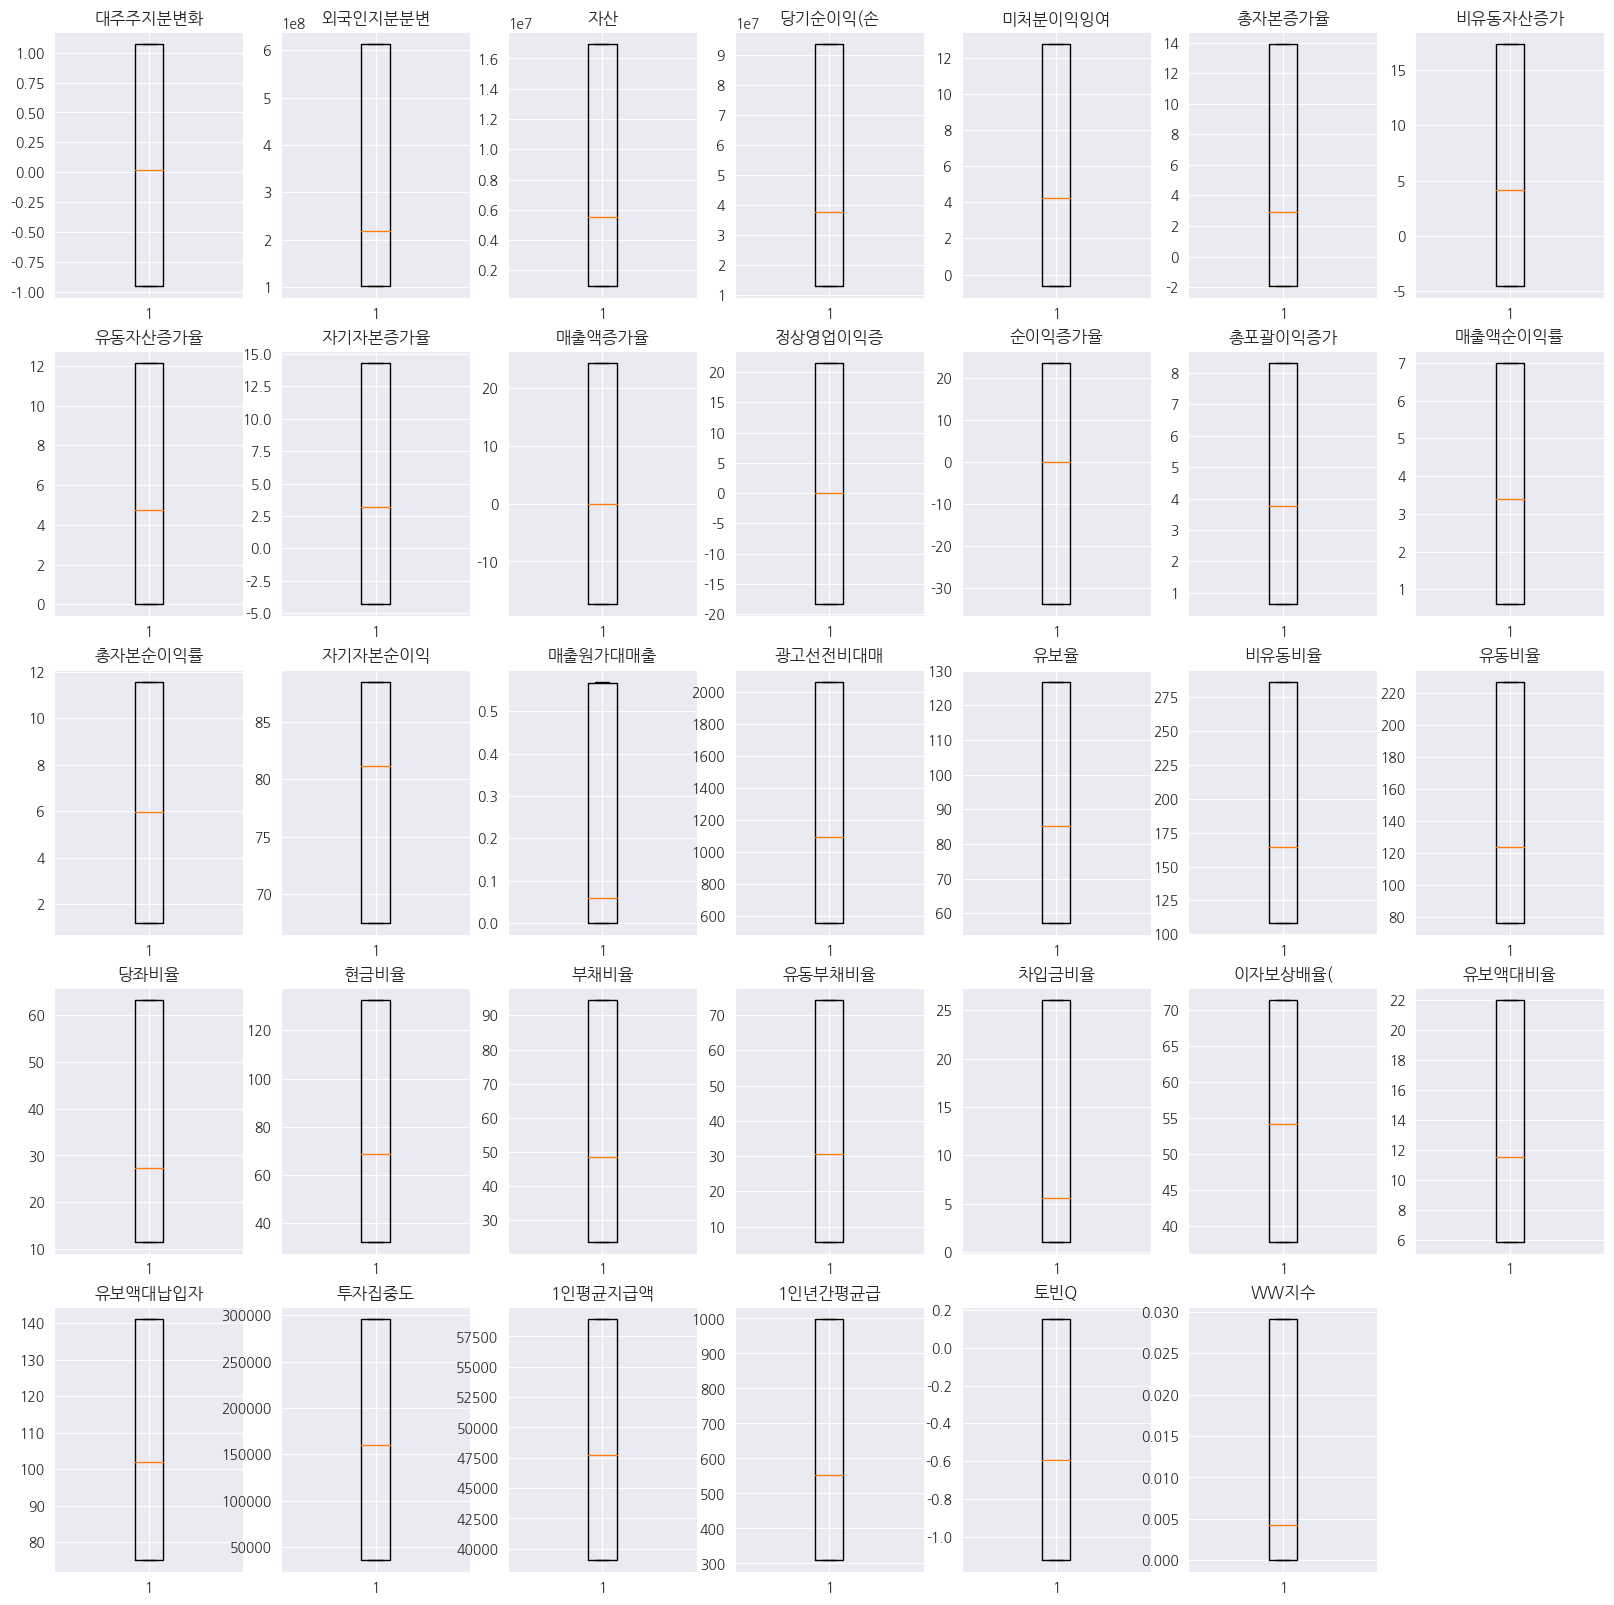

In [144]:
# 숫자현 컬럼만 있는 데이터프레임 생성 
df_수치 = df_수치[df_수치.select_dtypes(float).columns]

# 숫자형 데이터프레임 컬럼 추출
col_int=df_수치.columns

#  위저라이징을 통해 이상치를 대체한 데이터 박스플롯을 이용해 시각화

plt.figure(figsize=(20,20))

for i in range(1,35,1):
    plt.subplot(5,7,i)
    a = df_수치.iloc[:,i]
    plt.boxplot(a)
    b = col_int.str[:7][i-1]
    plt.title(b)
plt.show()
   
        

In [145]:
# 수치형 데이터와 수치형 데이터를 제외한 데이터 합병
# concat을 이용해 데이터을 단순히 합병했지만 삭제한 데이터가 없어 결측치는 없음
df_win = pd.concat([df_명목,df_수치],axis=1)

In [146]:
# 합친 데이터를 csv파일로 저장
df_win.to_csv("윈저라이징csv.csv", encoding="UTF-8-sig")

### IQR

In [147]:
# 숫자 컬럼만 있는 데이터프레임 생성 
df_수치 = df[df.select_dtypes(float).columns]
col_int = df_수치.columns
col_all = df.columns
col_obj = col_all.difference(col_int)
df_명목 = df[col_obj]

In [148]:
# iqr 함수 생성

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx



In [149]:
# iqr 함수 사용해서 이상치 제거 
for i in col_int:
    oulier_idx = get_outlier(df=df_수치,column=i, weight=1.5)
    df_수치.drop(index= oulier_idx, axis=0,inplace=True)
    df_수치.reset_index(drop=True, inplace=True)

df_수치

C:\Users\juno\AppData\Local\Temp\ipykernel_15324\2939445277.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_수치.drop(index= oulier_idx, axis=0,inplace=True)


,대주주지분변화분,외국인지분분변화,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,비유동자산증가율,유동자산증가율,자기자본증가율,매출액증가율,...,차입금비율,이자보상배율(이자비용),유보액대비율,유보액대납입자본배율,투자집중도,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,WW지수,RDS
0,3.58,-2.57,72339673.0,8134873.0,54967849.0,-8.43,-6.84,-12.41,9.84,-2.96,...,8.63,29.41,83.53,13.15,125.25,267169.0,57211.0,797.136033,-1.285584,0.000000
1,-9.82,2.23,381939281.0,10218575.0,21723195.0,5.51,-6.42,33.34,4.71,27.90,...,18.64,8.48,54.08,14.20,119.34,433000.0,47000.0,412.477457,-0.339797,0.000000
2,-0.36,0.43,422833445.0,19448583.0,30010526.0,10.71,4.92,20.18,6.10,2.42,...,22.93,14.66,51.88,15.09,131.52,302000.0,47000.0,403.398355,-0.998541,0.000000
3,3.58,0.72,417865468.0,16444650.0,29207034.0,-1.17,-3.08,1.55,3.62,-0.91,...,22.80,16.75,55.19,15.86,133.50,215000.0,48000.0,328.187829,-1.283361,0.000000
4,-0.15,1.42,93845576.0,1977524.0,19001437.0,0.71,-7.26,3.66,4.70,4.72,...,48.69,0.20,45.31,5.53,95.90,123000.0,46415.0,460.101805,-0.263883,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,-0.74,2.82,86761068.0,2971551.0,51820736.0,0.00,0.00,0.00,0.00,0.00,...,22.29,12.31,68.21,16.26,125.20,420000.0,29248.0,1098.387853,-0.433517,0.003557
669,-6.55,-0.57,397183609.0,10120295.0,103044601.0,-18.43,-3.31,-28.81,6.11,-12.73,...,7.34,2.30,42.01,2.68,75.73,104436.0,30253.0,119.160656,-1.132111,0.000000
670,0.00,0.61,113139294.0,5114677.0,36120640.0,14.60,21.24,11.61,18.33,17.59,...,21.58,8.78,72.20,11.65,108.96,243000.0,41000.0,915.429811,0.103507,0.005766
671,-10.26,-0.14,122924472.0,4028959.0,41122240.0,-0.08,-2.90,1.87,3.20,2.06,...,24.32,9.87,71.87,12.26,122.83,304000.0,45000.0,710.011543,-1.182744,0.005884


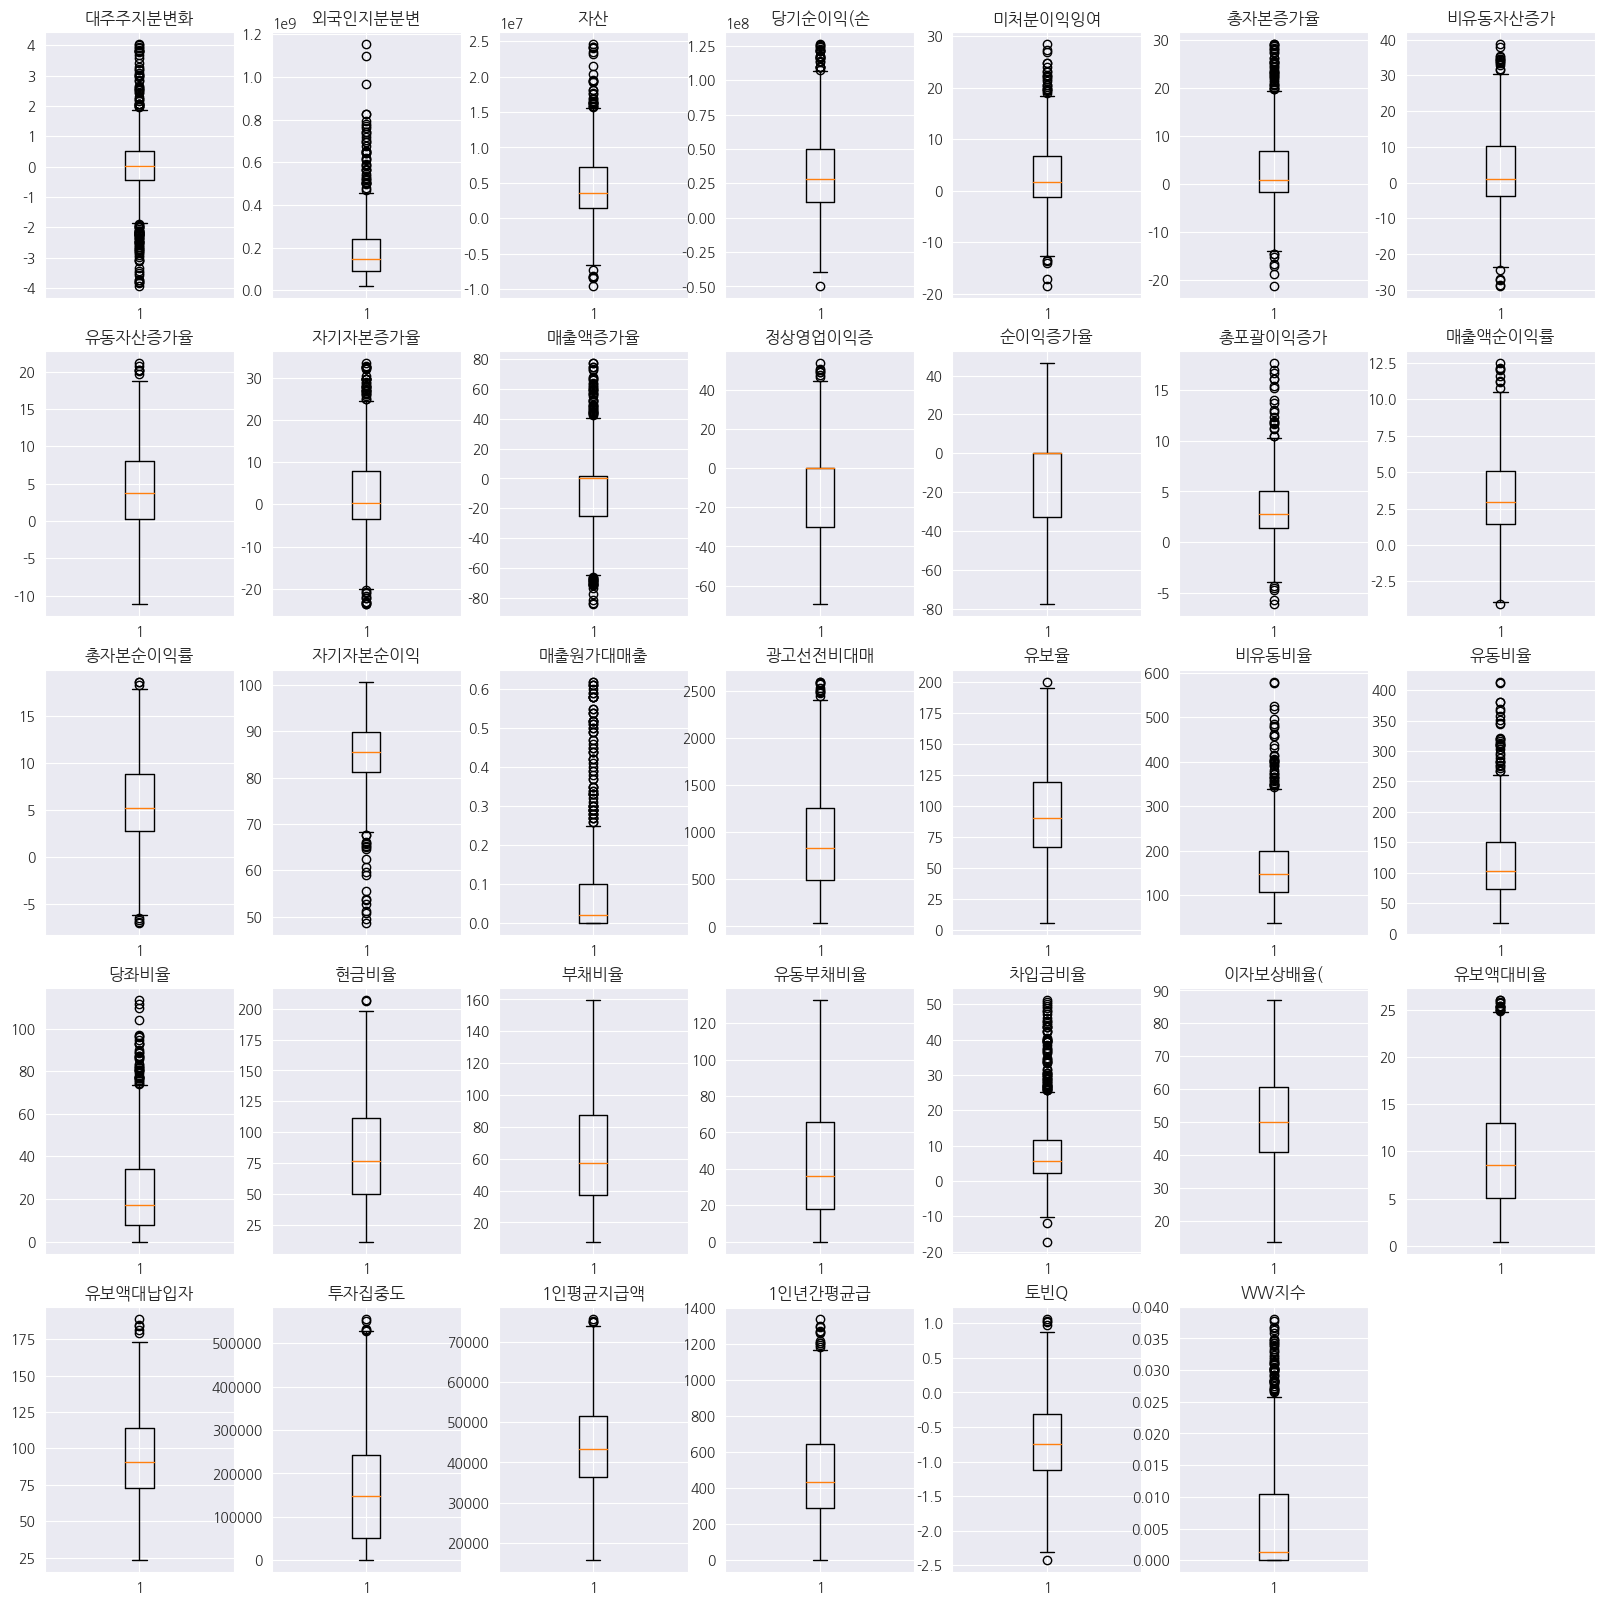

In [150]:
#  숫자현 컬럼만 있는 데이터프레임 생성 
df_수치 = df_수치[df_수치.select_dtypes(float).columns]

# 숫자형 데이터프레임 컬럼 추출
col_int=df_수치.columns

# iqr방식을 이용해서 3사분위수를 초과한 이상치화 1사분위수 미만의 이상치를 제거한 데이터를 박스플롯으로 시각화

plt.figure(figsize=(20,20))

for i in range(1,35,1):
    plt.subplot(5,7,i)
    a = df_수치.iloc[:,i]
    plt.boxplot(a)
    b = col_int.str[:7][i-1]
    plt.title(b)
plt.show()

In [151]:
# # 수치형 데이터와 수치형 데이터를 제외한 데이터 합병
df_iqr = pd.concat([df_명목,df_수치], axis=1)

In [152]:
# 단순 합병으로 인한 결측치 삭제
df_iqr.dropna(axis=0, inplace=True)

In [153]:
# iqr 이상치 제거한 데이터프레임 csv파일로 저장
df_iqr.to_csv("df_iqr.csv", encoding="UTF-8-sig")

## ESD
- 평균에서 부터 3표준편차 만큼 떨어져 있는 값(+-0.15%)을 임계값으로 보고 그 값보다 작거나 큰 값을 이상치로 분류한다 

In [154]:
# 숫자 컬럼만 있는 데이터프레임 생성 
df_수치 = df[df.select_dtypes(float).columns]
col_int = df_수치.columns
col_all = df.columns
col_obj = col_all.difference(col_int)
df_명목 = df[col_obj]

In [155]:
### ESD이상치
def EDS_outlier(df=None, col=None,weight=2):
    # import numpy as np
    m = np.mean(df[col])
    sd = np.std(df[col])
    sd_weight = sd*weight
    
    lowest = m -sd_weight
    highest = m + sd_weight

    outlier_idx = df[col][ (df[col] < lowest) | (df[col] > highest) ].index
    return outlier_idx

In [156]:
for i in col_int:
    oulier = EDS_outlier(df=df_수치,col= i,weight=2)
    df_수치.drop(index= oulier, axis=0, inplace=True)
    df_수치.reset_index(drop=True, inplace=True)
    

df_수치

C:\Users\juno\AppData\Local\Temp\ipykernel_15324\1286268799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_수치.drop(index= oulier, axis=0, inplace=True)


,대주주지분변화분,외국인지분분변화,자산,당기순이익(손실),미처분이익잉여금(결손금),총자본증가율,비유동자산증가율,유동자산증가율,자기자본증가율,매출액증가율,...,차입금비율,이자보상배율(이자비용),유보액대비율,유보액대납입자본배율,투자집중도,1인평균지급액(임원),1인년간평균급여(직원),토빈Q,WW지수,RDS
0,0.00,8.16,1.066534e+09,95087399.0,268675000.0,7.30,6.69,8.40,22.51,-1.54,...,54.62,6.77,33.47,1.60,138.53,649000.0,56000.0,463.306109,-0.671716,0.078906
1,-0.14,11.29,1.088890e+09,121159865.0,371828000.0,2.10,-3.00,11.19,15.45,20.64,...,39.20,13.44,40.67,1.99,125.81,9000.0,66000.0,953.096666,-0.485689,0.068485
2,2.11,3.32,8.553484e+07,4618332.0,43110947.0,-34.05,-34.35,-33.46,15.27,-21.25,...,55.71,5.62,56.34,10.48,141.36,233010.0,50868.0,689.109823,-1.991448,0.000000
3,3.58,-2.57,7.233967e+07,8134873.0,54967849.0,-8.43,-6.84,-12.41,9.84,-2.96,...,8.63,29.41,83.53,13.15,125.25,267169.0,57211.0,797.136033,-1.285584,0.000000
4,-0.13,5.30,1.107414e+08,15569914.0,22013011.0,0.23,-1.99,2.16,20.89,-0.43,...,11.36,26.68,26.41,0.52,44.09,103000.0,59000.0,1549.709255,-1.289141,0.000519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,30.32,0.04,5.976681e+07,4335697.0,19672012.0,33.67,-0.09,55.52,8.14,21.26,...,40.25,26.04,62.14,12.81,191.88,106625.0,30793.0,625.790694,0.284982,0.009379
4750,-30.47,1.63,5.761893e+07,6792228.0,29637157.0,4.04,53.57,-18.94,15.96,14.50,...,4.66,93.97,82.72,16.43,145.79,139320.0,39480.0,1467.161182,-0.743756,0.010564
4751,-32.18,0.06,7.470005e+07,1438707.0,26082533.0,-1.14,-0.75,-2.59,1.41,4.39,...,11.67,4.66,84.90,42.28,22.15,127850.0,21884.0,321.224126,-0.398667,0.000000
4752,-19.20,0.37,7.913716e+07,2177633.0,31018935.0,1.39,0.11,7.35,1.39,-7.26,...,8.67,7.66,86.38,45.57,36.89,0.0,25941.0,616.903104,0.492613,0.000000


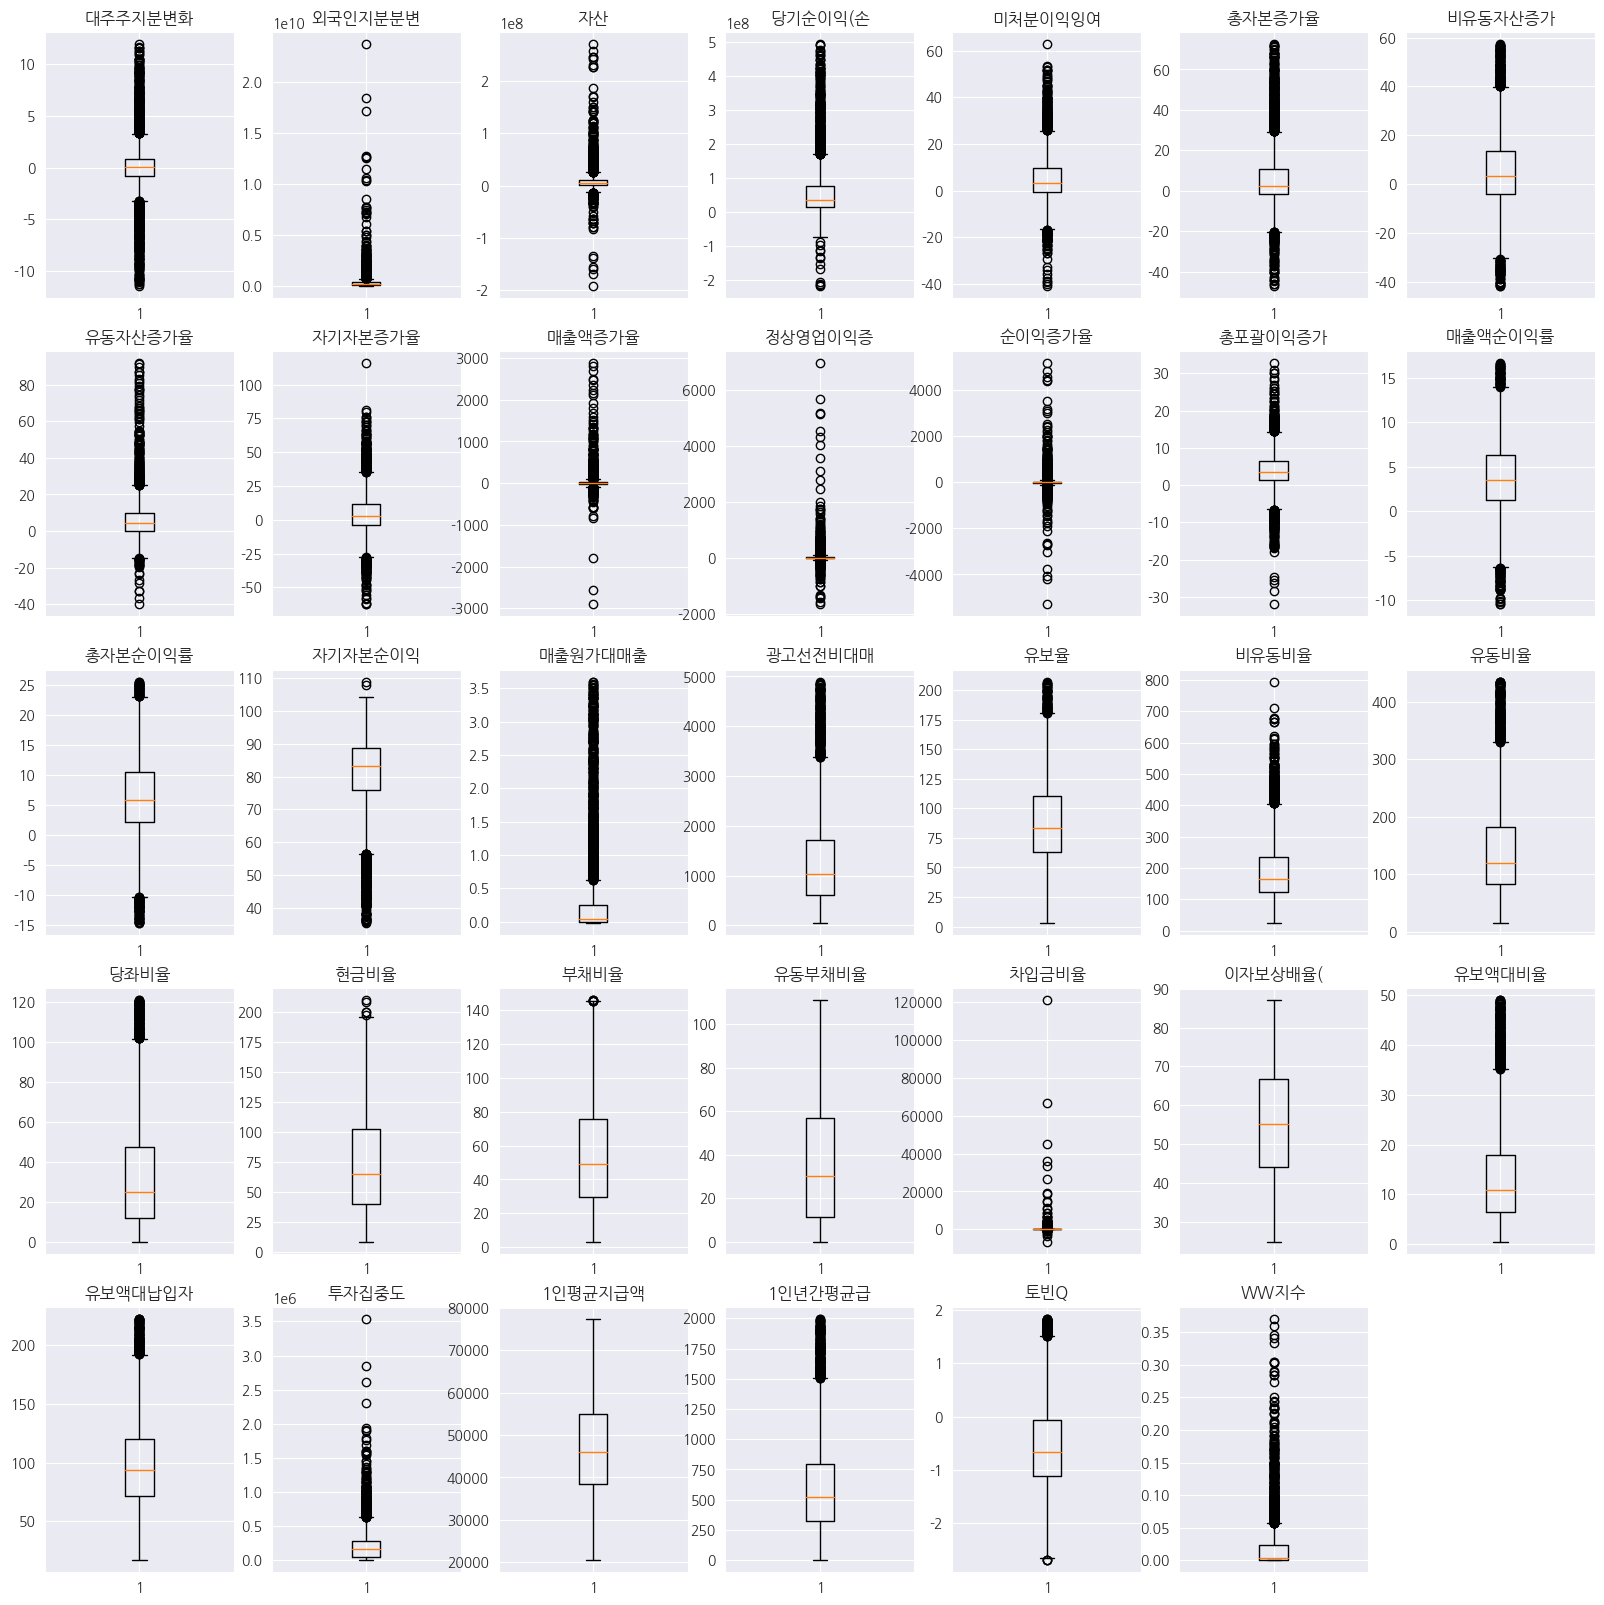

In [157]:
#  숫자현 컬럼만 있는 데이터프레임 생성 
df_수치 = df_수치[df_수치.select_dtypes(float).columns]

# 숫자형 데이터프레임 컬럼 추출
col_int=df_수치.columns

# eds방식을 이용해서 평균에서 2표준편차 이상 벗어난 이상치를 제거한 데이터를 박스플롯으로 시각화

plt.figure(figsize=(20,20))

for i in range(1,35,1):
    plt.subplot(5,7,i)
    a = df_수치.iloc[:,i]
    plt.boxplot(a)
    b = col_int.str[:7][i-1]
    plt.title(b)
plt.show()

In [158]:
# 수치형 데이터와 수치형 데이터를 제외한 데이터 합병
df_esd = pd.concat([df_명목,df_수치], axis=1)

In [159]:
# 단순 합병으로 인한 결측치 삭제
df_esd.dropna(axis=0, inplace=True)

In [160]:
# esd 이상치 제거한 데이터프레임 csv파일로 저장
df_esd.to_csv("df_esd.csv", encoding="UTF-8-sig")

## isolation forest 클러스터

In [161]:
# 숫자 컬럼만 있는 데이터프레임 생성 
df_수치 = df[df.select_dtypes(float).columns]
col_int = df_수치.columns
col_all = df.columns
col_obj = col_all.difference(col_int)
df_명목 = df[col_obj]

In [162]:
# 라이브러리 로그
from sklearn.ensemble import IsolationForest

In [163]:
clf = IsolationForest(max_samples=100, contamination = 0.1, random_state=42)
clf.fit(df_수치)

c:\Users\juno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, max_samples=100, random_state=42)

In [164]:
# 이상치가 아닌 값 추출해서 데이터프레임 화
isol_df = df_수치[clf.predict(df_수치) != -1]

In [165]:
# 데이터 합볍
df_isol = pd.concat([df_명목, isol_df], axis=1)

In [166]:
# 데이터 단순 합병으로 인한 결측치 제거 
df_isol.dropna(axis=0,inplace=True)

In [167]:
# 데이터 csv로 저장
df_isol.to_csv("df_isol.csv", encoding= "UTF-8-sig")

## k-means clustering

In [11]:
# 숫자 컬럼만 있는 데이터프레임 생성 
df_수치 = df[df.select_dtypes(float).columns]
col_int = df_수치.columns
col_all = df.columns
col_obj = col_all.difference(col_int)
df_명목 = df[col_obj]

In [12]:
# 라이브러리 로그
from sklearn.cluster import KMeans

In [13]:
# KMeans 클러스터링을 이용해서 이상치 제거
clf = KMeans(n_clusters=20, random_state=156)
clf.fit(df_수치)
df_km = df_수치[clf.predict(df_수치)==0]


c:\Users\juno\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# 데이터 합병
df_km = pd.concat([df_km,df_명목], axis=1) 

In [20]:
# 데이터 합병으로 인한 결측치 제거
df_km.dropna(axis = 0, inplace = True)

In [21]:
df_km.to_csv("df_km.csv", encoding = "UTF-8-sig")